In [1]:
import os
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [2]:
#Setup Database
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client["rosen"]
collection = db["big_data"]

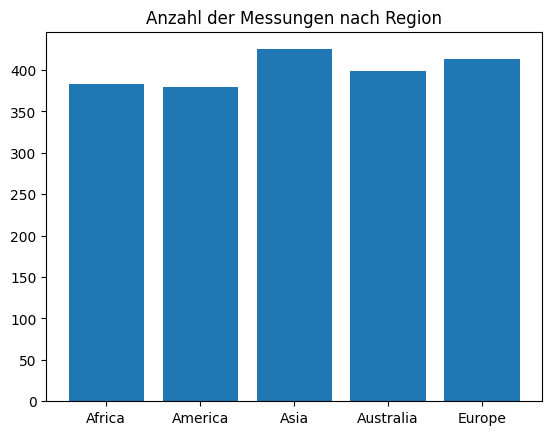

In [7]:
# Basic stats for every region
regions = collection.distinct("configuration")
region_counts = []
for region in regions:
    count = collection.count_documents({"configuration": region})
    region_counts.append(count)
    
plt.bar(regions, region_counts)
plt.title("Anzahl der Messungen nach Region")
plt.show()

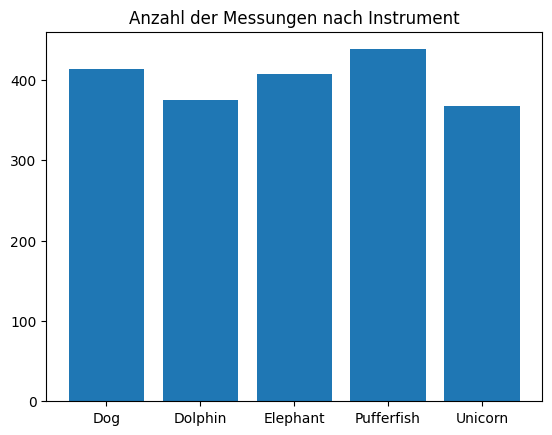

In [9]:
# Basic stats for every instrument
instruments = collection.distinct("instrument")
instrument_counts = []
for instrument in instruments:
    count = collection.count_documents({"instrument": instrument})
    instrument_counts.append(count)

plt.bar(instruments, instrument_counts)
plt.title("Anzahl der Messungen nach Instrument")
plt.show()

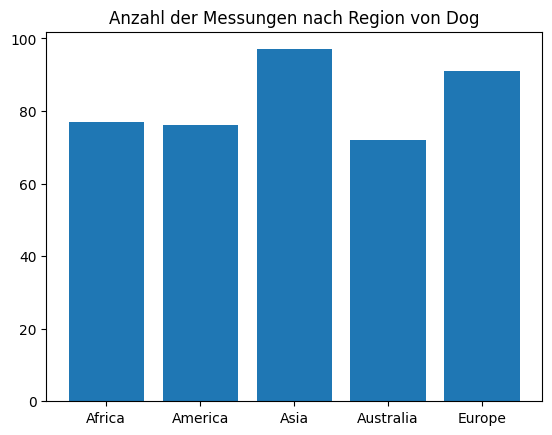

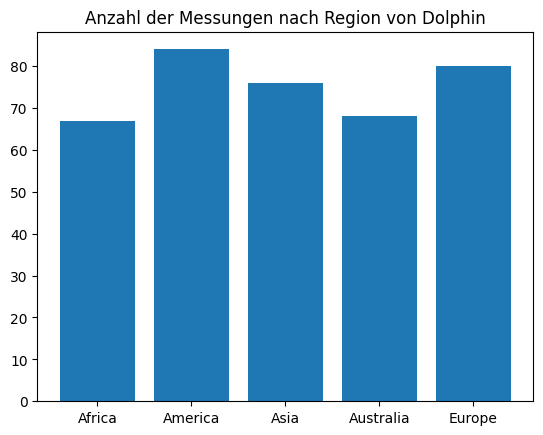

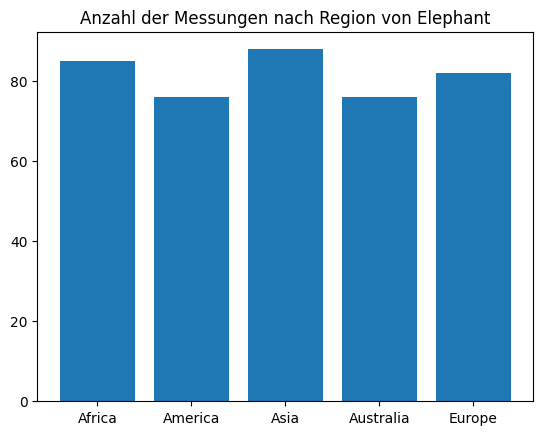

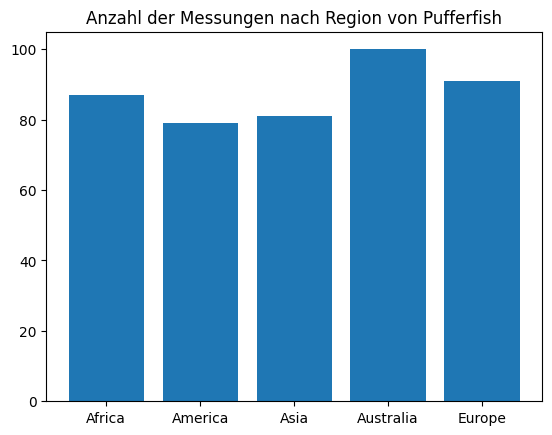

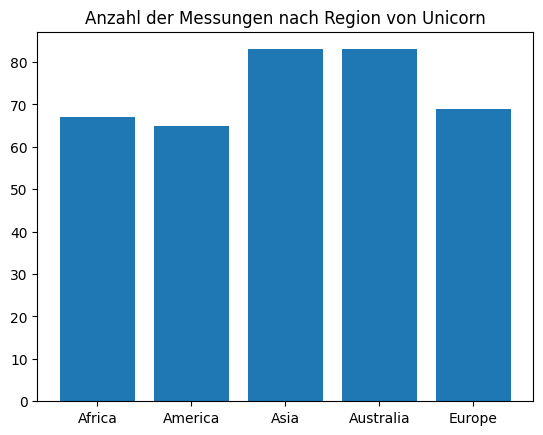

In [10]:
# Basic stats for every instrument in every region
instruments = collection.distinct("instrument")
instrument_counts = []
regions = collection.distinct("configuration")
for instrument in instruments:
    region_counts = []
    for region in regions:
        count = collection.count_documents({"configuration": region, "instrument": instrument})
        region_counts.append(count)
    count = collection.count_documents({"instrument": instrument})
    instrument_counts.append(count)
    plt.bar(regions, region_counts)
    plt.title(f"Anzahl der Messungen nach Region von {instrument}")
    plt.show()

In [11]:
client.close()